In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/facenet_keras.h5')
print(model.inputs)
print(model.outputs)

[<KerasTensor: shape=(None, 160, 160, 3) dtype=float32 (created by layer 'input_1')>]
[<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'Bottleneck_BatchNorm')>]


In [ ]:
pip install mtcnn

     |████████████████████████████████| 2.3MB 27.7MB/s 


In [ ]:
import mtcnn
print(mtcnn.__version__)

0.1.0


In [ ]:
# function for face detection with mtcnn
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN

def extract_face(filename, required_size=(160, 160)):
	image = Image.open('/content/drive/MyDrive/test-dataset/train/komali/20210505_220458.jpg')
	image = image.convert('RGB')
	pixels = asarray(image)
	detector = MTCNN()
	results = detector.detect_faces(pixels)
	x1, y1, width, height = results[0]['box']
	x1, y1 = abs(x1), abs(y1)
	x2, y2 = x1 + width, y1 + height
	face = pixels[y1:y2, x1:x2]
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

pixels = extract_face('...')

1 (160, 160, 3)
2 (160, 160, 3)
3 (160, 160, 3)
4 (160, 160, 3)
5 (160, 160, 3)
6 (160, 160, 3)
7 (160, 160, 3)
8 (160, 160, 3)
9 (160, 160, 3)
10 (160, 160, 3)
11 (160, 160, 3)
12 (160, 160, 3)
13 (160, 160, 3)
14 (160, 160, 3)
15 (160, 160, 3)


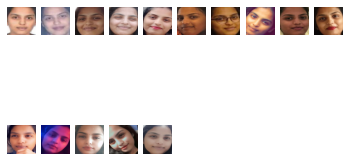

In [ ]:
# demonstrate face detection Faces Dataset
from os import listdir
from PIL import Image
from numpy import asarray
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN

def extract_face(filename, required_size=(160, 160)):
	image = Image.open(filename)
	image = image.convert('RGB')
	pixels = asarray(image)
	detector = MTCNN()
	results = detector.detect_faces(pixels)
	x1, y1, width, height = results[0]['box']
	x1, y1 = abs(x1), abs(y1)
	x2, y2 = x1 + width, y1 + height
	face = pixels[y1:y2, x1:x2]
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

# specify folder to plot
folder = '/content/drive/MyDrive/test-dataset/train/komali/'
i = 1
for filename in listdir(folder):
	path = folder + filename
	face = extract_face(path)
	print(i, face.shape)
	pyplot.subplot(2, 10, i)
	pyplot.axis('off')
	pyplot.imshow(face)
	i += 1
pyplot.show()

1 (160, 160, 3)
2 (160, 160, 3)
3 (160, 160, 3)
4 (160, 160, 3)
5 (160, 160, 3)


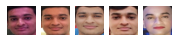

In [ ]:
# demonstrate face detection on Faces Dataset
from os import listdir
from PIL import Image
from numpy import asarray
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN

def extract_face(filename, required_size=(160, 160)):
	image = Image.open(filename)
	image = image.convert('RGB')
	pixels = asarray(image)
	detector = MTCNN()
	results = detector.detect_faces(pixels)
	x1, y1, width, height = results[0]['box']
	x1, y1 = abs(x1), abs(y1)
	x2, y2 = x1 + width, y1 + height
	face = pixels[y1:y2, x1:x2]
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

# specify folder to plot
folder = '/content/drive/MyDrive/test-dataset/val/khush/'
i = 1
# enumerate files
for filename in listdir(folder):
	# path
	path = folder + filename
	# get face
	face = extract_face(path)
	print(i, face.shape)
	# plot
	pyplot.subplot(2, 10, i)
	pyplot.axis('off')
	pyplot.imshow(face)
	i += 1
pyplot.show()

In [ ]:
from os import listdir
from os.path import isdir
from PIL import Image
from matplotlib import pyplot
from numpy import savez_compressed
from numpy import asarray
from mtcnn.mtcnn import MTCNN

# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
	image = Image.open(filename)
	image = image.convert('RGB')
	pixels = asarray(image)
	detector = MTCNN()
	results = detector.detect_faces(pixels)
	x1, y1, width, height = results[0]['box']
	x1, y1 = abs(x1), abs(y1)
	x2, y2 = x1 + width, y1 + height
	face = pixels[y1:y2, x1:x2]
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

# load images and extract faces for all images in a directory
def load_faces(directory):
	faces = list()
	# enumerate files
	for filename in listdir(directory):
		# path
		path = directory + filename
		# get face
		face = extract_face(path)
		# store
		faces.append(face)
	return faces

# load a dataset that contains one subdir for each class that in turn contains images
def load_dataset(directory):
	X, y = list(), list()
	for subdir in listdir(directory):
		path = directory + subdir + '/';print(">path:",path)
		if not isdir(path):
			continue
		faces = load_faces(path)
		labels = [subdir for _ in range(len(faces))]
		print('>loaded %d examples for class: %s' % (len(faces), subdir))
		X.extend(faces)
		y.extend(labels)
	return asarray(X), asarray(y)

# load train dataset
trainX, trainy = load_dataset('/content/drive/MyDrive/test-dataset/train/')
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset('/content/drive/MyDrive/test-dataset/val/')
# save arrays to one file in compressed format
savez_compressed('test-dataset.npz', trainX, trainy, testX, testy)

>path: /content/drive/MyDrive/test-dataset/train/komali/
>loaded 15 examples for class: komali
>path: /content/drive/MyDrive/test-dataset/train/khush/
>loaded 19 examples for class: khush
>path: /content/drive/MyDrive/test-dataset/train/satvika/
>loaded 17 examples for class: satvika
>path: /content/drive/MyDrive/test-dataset/train/neha/
>loaded 14 examples for class: neha
>path: /content/drive/MyDrive/test-dataset/train/hussain/
>loaded 11 examples for class: hussain
(76, 160, 160, 3) (76,)
>path: /content/drive/MyDrive/test-dataset/val/neha/
>loaded 3 examples for class: neha
>path: /content/drive/MyDrive/test-dataset/val/satvika/
>loaded 5 examples for class: satvika
>path: /content/drive/MyDrive/test-dataset/val/hussain/
>loaded 5 examples for class: hussain
>path: /content/drive/MyDrive/test-dataset/val/komali/
>loaded 5 examples for class: komali
>path: /content/drive/MyDrive/test-dataset/val/khush/
>loaded 5 examples for class: khush


In [ ]:
# calculate a face embedding for each face in the dataset using facenet
from numpy import load
from numpy import expand_dims
from numpy import asarray
from numpy import savez_compressed
from keras.models import load_model

# get the face embedding for one face
def get_embedding(model, face_pixels):
	face_pixels = face_pixels.astype('float32')
	mean, std = face_pixels.mean(), face_pixels.std()
	face_pixels = (face_pixels - mean) / std
	samples = expand_dims(face_pixels, axis=0)
	yhat = model.predict(samples)
	return yhat[0]

# load the face dataset
data = load('/content/test-dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)
model = load_model('/content/drive/MyDrive/facenet_keras.h5')
print('Loaded Model')
newTrainX = list()
for face_pixels in trainX:
	embedding = get_embedding(model, face_pixels)
	newTrainX.append(embedding)
newTrainX = asarray(newTrainX)
print(newTrainX.shape)
newTestX = list()
for face_pixels in testX:
	embedding = get_embedding(model, face_pixels)
	newTestX.append(embedding)
newTestX = asarray(newTestX)
print(newTestX.shape)
# save arrays to one file in compressed format
savez_compressed('test-embeddings.npz', newTrainX, trainy, newTestX, testy)

Loaded:  (76, 160, 160, 3) (76,) (23, 160, 160, 3) (23,)
Loaded Model
Cause: could not parse the source code of <function <lambda> at 0x7f46860eb5f0>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x7f46860eb5f0>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x7f46860eb320>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x7f46860eb320>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x7f46860eb0e0>: no matching AST found
To silence this warning, decorate the f

In [ ]:
from numpy import load
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
# load dataset
data = load('/content/test-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)
yhat_train = model.predict(trainX)
yhat_test = model.predict(testX)
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Dataset: train=76, test=23
Accuracy: train=100.000, test=91.304


i: 0
Predicted: satvika (36.684)
Expected: neha


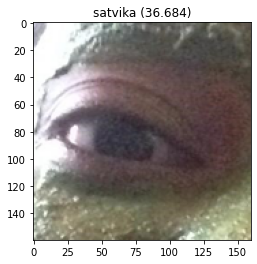

i: 6
Predicted: hussain (41.622)
Expected: satvika


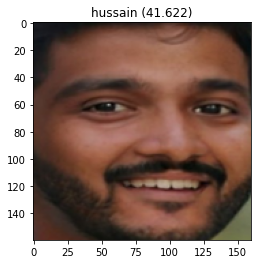

i: 12
Predicted: hussain (77.290)
Expected: hussain


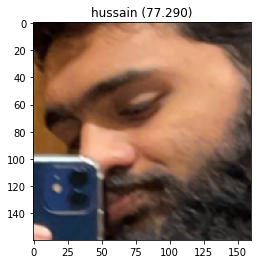

i: 15
Predicted: komali (85.667)
Expected: komali


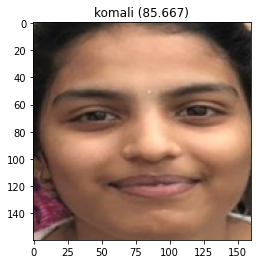

i: 18
Predicted: khush (84.837)
Expected: khush


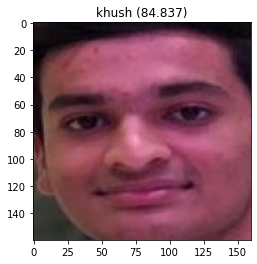

,Name,Roll Number,30/05/2021
0,komali,160118733067,Present
1,khush,160118733101,Present
2,satvika,160118733079,Absent
3,hussain,160118733092,Present
4,neha,160118733070,Absent


In [ ]:
import numpy
from random import choice
from numpy import load
from numpy import expand_dims
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from matplotlib import pyplot
from PIL import Image
from datetime import date

names=['komali','khush','satvika','hussain','neha']
roll=['160118733067','160118733101','160118733079','160118733092','160118733070']
import openpyxl
wb=openpyxl.Workbook()
sheet=wb.active
c1=sheet.cell(row=1,column=1)
c1.value='Name'
c2=sheet.cell(row=1,column=2)
c2.value='Roll Number'
c3=sheet.cell(row=1,column=3)
d=date.today()
val=d.strftime("%d/%m/%Y")
c3.value=val
# print(type(date.today()))
for i in range(0,5):
  a=sheet.cell(row=i+2,column=1)
  a.value=names[i]
  c=sheet.cell(row=i+2,column=2)
  c.value=roll[i]
  b=sheet.cell(row=i+2,column=3)
  b.value='Absent'
def attendance(name):
  
  #   # b=sheet.cell(row=i+1,column=2)
  #   # b.value='Absent'
  # c3=sheet.cell(row=2,column=1)
  # c3.value=names[0]
  # c4=sheet.cell(row=3,column=1)
  # c4.value=names[1]
  for i in range(1,10):
    if str(sheet.cell(row=i+1,column=1).value)==str(name):
      b=sheet.cell(row=i+1,column=3)
      b.value='Present'

test1=[1,7,11,14,19]
test2=[0,6,12,15,18]
tests=[0,6,11]
tests2=[1,5,10]
# load faces
data = load('test-dataset.npz')
testX_faces = data['arr_2']
data = load('test-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)
# test model
for i in test2:
  selection=i
  print("i:",selection)
# selection = choice([i for i in range(testX.shape[0])])
  random_face_pixels = testX_faces[selection]
  random_face_emb = testX[selection]
  random_face_class = testy[selection]
  random_face_name = out_encoder.inverse_transform([random_face_class])
# prediction for the face
  samples = expand_dims(random_face_emb, axis=0)
  yhat_class = model.predict(samples)
  yhat_prob = model.predict_proba(samples)
# get name
  class_index = yhat_class[0]
  class_probability = yhat_prob[0,class_index] * 100
  predict_names = out_encoder.inverse_transform(yhat_class)
  print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
  print('Expected: %s' % random_face_name[0])
  #print(type(predict_names[0]))
  #print(type(random_face_name[0]))
  pyplot.imshow(random_face_pixels)
  title = '%s (%.3f)' % (predict_names[0], class_probability)
  pyplot.title(title)
  pyplot.show()
  a=''
  if numpy.char.equal(predict_names[0], random_face_name[0]):
     a=predict_names[0]
     attendance(str(a))


    
wb.save("attendance.xlsx")
import pandas as pd
df = pd.read_excel('attendance.xlsx')
df

In [ ]:
pip freeze requirements.txt

absl-py==0.12.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
appdirs==1.4.4
argon2-cffi==20.1.0
arviz==0.11.2
astor==0.8.1
astropy==4.2.1
astunparse==1.6.3
async-generator==1.10
atari-py==0.2.6
atomicwrites==1.4.0
attrs==21.2.0
audioread==2.1.9
autograd==1.3
Babel==2.9.1
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==3.3.0
blis==0.4.1
bokeh==2.3.2
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.6
cachetools==4.2.2
catalogue==1.0.0
certifi==2020.12.5
cffi==1.14.5
cftime==1.4.1
chainer==7.4.0
chardet==3.0.4
click==8.0.0
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorcet==2.0.6
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.3.2
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.6
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.5
Cython==0.29.23
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==0.3.3
distributed==1.25.3
dlib==19.18.0
dm-tree==0.1.6
docopt